# Chapter 11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import svd
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Replacing missing data

In [2]:
data = pd.DataFrame([[1, 2, np.NaN],
                     [np.NaN, 2, np.NaN],
                     [3, np.NaN, np.NaN],
                     [np.NaN, 3, 8],
                     [5, 3, np.NaN]],
                    columns=['A', 'B', 'C'])
print(data,'\n')
print(data.isnull().sum(axis=0))

     A    B    C
0  1.0  2.0  NaN
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  3.0  8.0
4  5.0  3.0  NaN 

A    2
B    1
C    4
dtype: int64


In [3]:
data.drop('C', axis=1, inplace=True)
data['missing_B'] = data['B'].isnull().astype(int)
data['B'].fillna(data['B'].mean(), inplace=True)
data['A'].interpolate(method='linear', inplace=True)

print(data)

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.5          1
3  4.0  3.0          0
4  5.0  3.0          0


### Singular value decomposition

In [4]:
A = np.arange(9).reshape(3, -1) + 1
print(A)

U, s, VT = svd(A)
Sigma = np.diag(s)
print("\nU:\n{}\n\nSigma:\n{}\n\nVt:\n{}".format(U, Sigma, VT))

B = U.dot(Sigma.dot(VT))
print("\n", B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

U:
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

Sigma:
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.41842475e-16]]

Vt:
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]

 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### Principal component analysis

In [5]:
# boston = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

pca = PCA().fit(data)

In [6]:
print(' '.join(['%5i'%(k+1) for k in range(13)]))
print(' '.join(['-----']*13))
print(' '.join(['%0.3f'%variance for variance in pca.explained_variance_ratio_]))
print(' '.join(['%0.3f'%variance for variance in np.cumsum(pca.explained_variance_ratio_)]))

    1     2     3     4     5     6     7     8     9    10    11    12    13
----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
0.806 0.163 0.021 0.007 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.806 0.969 0.990 0.997 0.998 0.999 1.000 1.000 1.000 1.000 1.000 1.000 1.000


<AxesSubplot:>

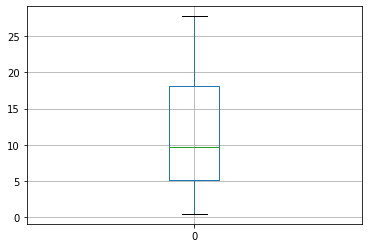

In [7]:
pd.DataFrame(data[:, 2]).boxplot(return_type='axes')

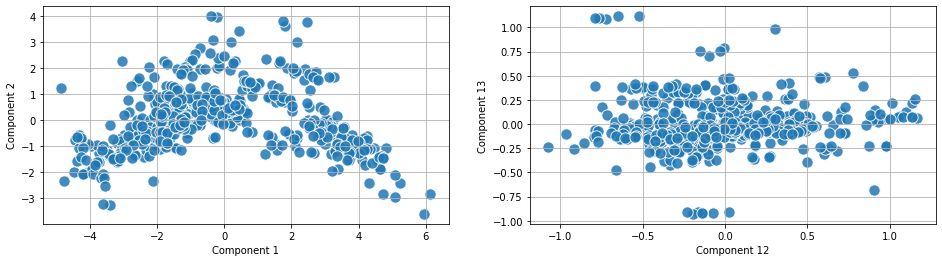

In [8]:
pca = PCA()
pca.fit(scale(data))

C = pca.transform(scale(data))

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.scatter(C[:,0], C[:,1], s=128, edgecolors='white', alpha=0.85, cmap='autumn')
ax1.grid()
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')

ax2.scatter(C[:,-2], C[:,-1], s=128, edgecolors='white', alpha=0.85, cmap='autumn')
ax2.grid()
ax2.set_xlabel('Component 12')
ax2.set_ylabel('Component 13')

plt.show()